# Load Package

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from pykin.utils import plot_utils as p_utils
%matplotlib inline

In [48]:
def linearplot_with_confidence(x_list, error_list, label, marker="", color='r'):
    mean_list = np.squeeze(np.mean(error_list,axis=0))
    std_list = np.std(error_list,axis=0)
    a = 0.1
    plt.fill_between(x_list, mean_list-a*std_list,mean_list+a*std_list, alpha=0.13, color=color)
    plt.plot(x_list,mean_list,label=label,marker=marker, ms=11, c=color, markevery=15)

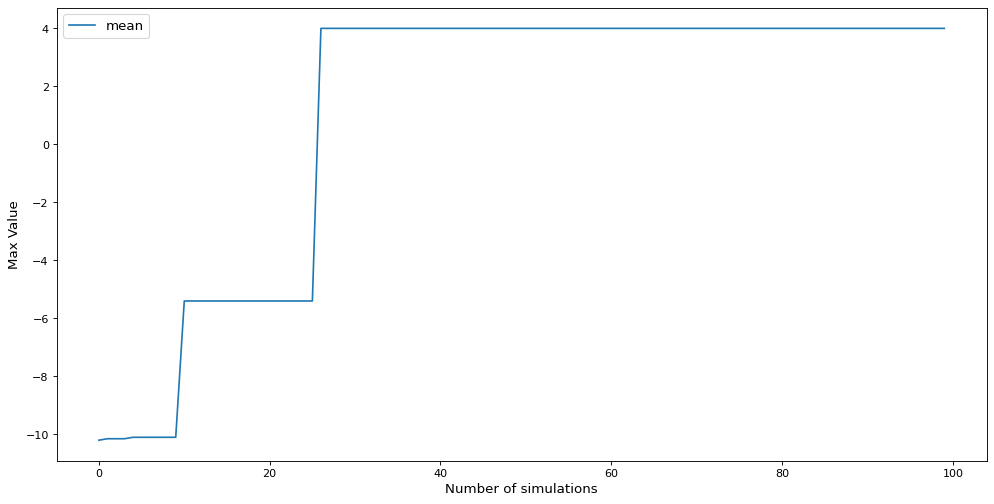

In [49]:
seed=1
budgets = 100
end_num = 0
algo = "bai_perturb"
filename = f'benchmark2_result/benchmark2_test_algo({algo})_budget({budgets})_seed({seed})_{end_num}.npy'

perturb_final_level_1_values = []
perturb_final_level_2_values = []
perturb_final_pnp_all_joint_paths = []

with open(filename,'rb') as f:
    data_for_seed = np.load(f, allow_pickle=True)
    perturb_final_level_1_values.append(data_for_seed['level_1_values'])
    perturb_final_level_2_values.append(data_for_seed['level_2_values'])
    perturb_final_pnp_all_joint_paths.append(data_for_seed['pnp_all_joint_paths'])

fig, ax = p_utils.init_2d_figure("test")
mean_result = np.mean(perturb_final_level_1_values[0], axis=0)
p_utils.plot_values(
    ax,
    mean_result, 
    label="mean", 
    title="Benchamrk1_Level_1", 
    save_dir_name='benchmark2_result', 
    is_save=False)

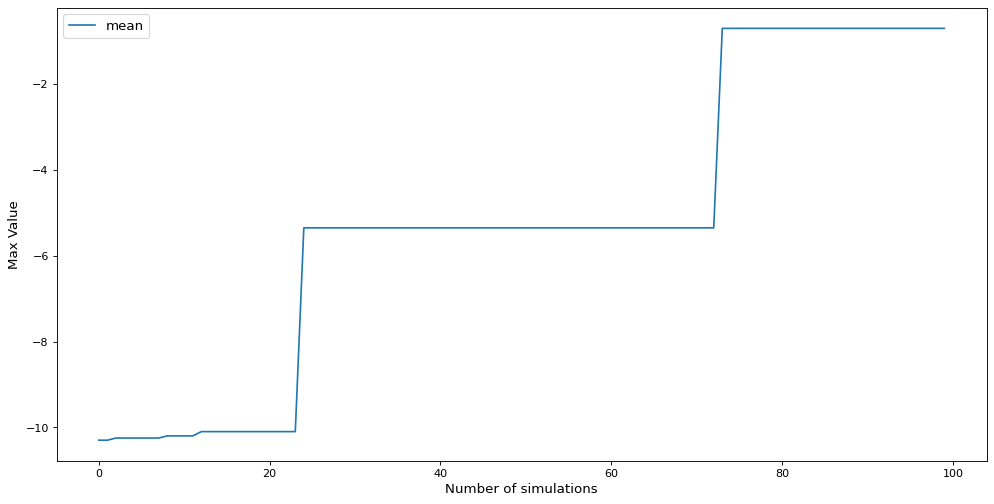

In [50]:
seed=2
budgets = 100
end_num = 0
algo = "uct"
filename = f'benchmark2_result/benchmark2_test_algo({algo})_budget({budgets})_seed({seed})_{end_num}.npy'

uct_final_level_1_values = []
uct_final_level_2_values = []
uct_final_pnp_all_joint_paths = []

with open(filename,'rb') as f:
    data_for_seed = np.load(f, allow_pickle=True)
    uct_final_level_1_values.append(data_for_seed['level_1_values'])
    uct_final_level_2_values.append(data_for_seed['level_2_values'])
    uct_final_pnp_all_joint_paths.append(data_for_seed['pnp_all_joint_paths'])

fig, ax = p_utils.init_2d_figure("test")
mean_result = np.mean(uct_final_level_1_values[0], axis=0)
p_utils.plot_values(
    ax,
    mean_result, 
    label="mean", 
    title="Benchamrk1_Level_1", 
    save_dir_name='benchmark2_result', 
    is_save=False)

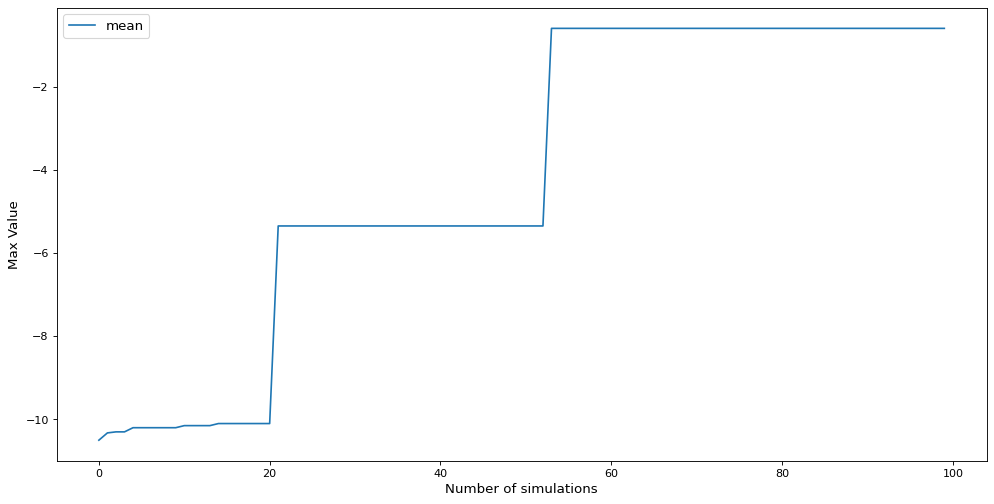

In [51]:
seed=2
budgets = 100
end_num = 0
algo = "random"
filename = f'benchmark2_result/benchmark2_test_algo({algo})_budget({budgets})_seed({seed})_{end_num}.npy'

random_final_level_1_values = []
random_final_level_2_values = []
random_final_pnp_all_joint_paths = []

with open(filename,'rb') as f:
    data_for_seed = np.load(f, allow_pickle=True)
    random_final_level_1_values.append(data_for_seed['level_1_values'])
    random_final_level_2_values.append(data_for_seed['level_2_values'])
    random_final_pnp_all_joint_paths.append(data_for_seed['pnp_all_joint_paths'])

fig, ax = p_utils.init_2d_figure("test")
mean_result = np.mean(random_final_level_1_values[0], axis=0)
p_utils.plot_values(
    ax,
    mean_result, 
    label="mean", 
    title="Benchamrk1_Level_1", 
    save_dir_name='benchmark2_result', 
    is_save=False)

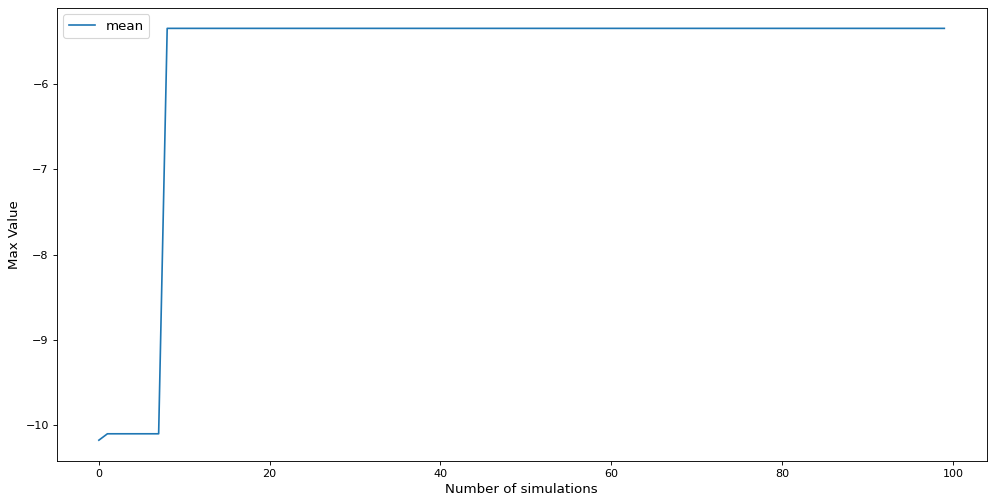

In [52]:
seed=1
budgets = 100
end_num = 0
algo = "bai_ucb"
filename = f'benchmark2_result/benchmark2_test_algo({algo})_budget({budgets})_seed({seed})_{end_num}.npy'

bai_ucb_final_level_1_values = []
bai_ucb_final_level_2_values = []
bai_ucb_final_pnp_all_joint_paths = []

with open(filename,'rb') as f:
    data_for_seed = np.load(f, allow_pickle=True)
    bai_ucb_final_level_1_values.append(data_for_seed['level_1_values'])
    bai_ucb_final_level_2_values.append(data_for_seed['level_2_values'])
    bai_ucb_final_pnp_all_joint_paths.append(data_for_seed['pnp_all_joint_paths'])

fig, ax = p_utils.init_2d_figure("test")
mean_result = np.mean(bai_ucb_final_level_1_values[0], axis=0)
p_utils.plot_values(
    ax,
    mean_result, 
    label="mean", 
    title="Benchamrk1_Level_1", 
    save_dir_name='benchmark2_result', 
    is_save=False)

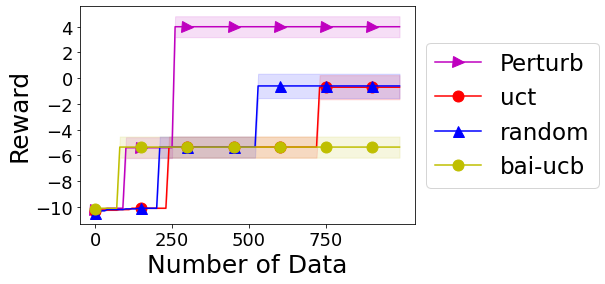

In [53]:
x_list = 10*np.arange(len(perturb_final_level_1_values[0][0]))
linearplot_with_confidence(x_list, perturb_final_level_1_values[0], "Perturb", ">", "m")
linearplot_with_confidence(x_list, uct_final_level_1_values[0], "uct","o", "r")
linearplot_with_confidence(x_list, random_final_level_1_values[0], "random","^", "b")
linearplot_with_confidence(x_list, bai_ucb_final_level_1_values[0], "bai-ucb","o", "y")
# plt.xlim([np.min(x_list),np.max(x_list)])
plt.xlabel("Number of Data",fontsize=25)
plt.ylabel("Reward",fontsize=25)

plt.xticks(x_list[::25],x_list[::25],fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 23})
plt.show()

# Load Result Data

In [54]:
n_seeds=5
budgets = 100
end_num = 0
algos = ["bai_perturb", "uct", "random", "bai_ucb"]

In [55]:
final_level_1_values = [[] for _ in range(len(algos))]
final_level_2_values = [[] for _ in range(len(algos))]
final_pnp_all_joint_paths = [[] for _ in range(len(algos))]
for idx, algo in enumerate(algos):
    for seed in range(1, n_seeds+1):
        filename = 'benchmark2_result/benchmark2_test_algo({:})_budget({:})_seed({:})_{}.npy'.format(algo, budgets, seed, end_num)
        try:
            with open(filename,'rb') as f:
                data_for_seed = np.load(f, allow_pickle=True)
                final_level_1_values[idx].append(data_for_seed['level_1_values'])
                final_level_2_values[idx].append(data_for_seed['level_2_values'])
                final_pnp_all_joint_paths[idx].append(data_for_seed['pnp_all_joint_paths'])
        except FileNotFoundError as e:
            print(e)


# Plot Results

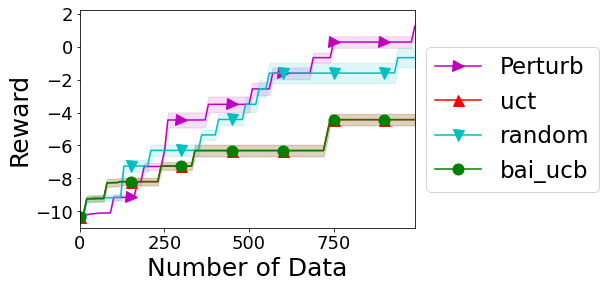

In [56]:
level_1_results = [[] for _ in range(len(algos))]
for idx, algo in enumerate(algos):
    for i in range(n_seeds):
        level_1_results[idx].append(np.mean(final_level_1_values[idx][i], axis=0))

# result = np.mean(results, axis=0)
x_list = 10*np.arange(len(level_1_results[0][0]))
plt.xlim([np.min(x_list),np.max(x_list)])
linearplot_with_confidence(x_list, level_1_results[0], "Perturb", ">", "m")
linearplot_with_confidence(x_list, level_1_results[1], "uct", "^", "r")
linearplot_with_confidence(x_list, level_1_results[2], "random", "v", "c")
linearplot_with_confidence(x_list, level_1_results[3], "bai_ucb", "o", "g")
plt.xlabel("Number of Data",fontsize=25)
plt.ylabel("Reward",fontsize=25)

plt.xticks(x_list[::25],x_list[::25],fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 23})
plt.show()